In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import get_chi_donor as pre
import math

G = nx.DiGraph()

nodes=np.arange(-9,9,1)
print(nodes)
G.add_nodes_from(nodes)

test_donor_dt = pre.dependence_table("BNoutput/Train_donor_signal.txt")
for j in range(18):
    for k in range(j, 18):
        if test_donor_dt[j, k]:
            G.add_edge(j-9, k-9)
# print(chart)
df = pd.DataFrame(test_donor_dt,columns=nodes)
df.to_csv("BNoutput/dependence_table.csv",index=None)

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


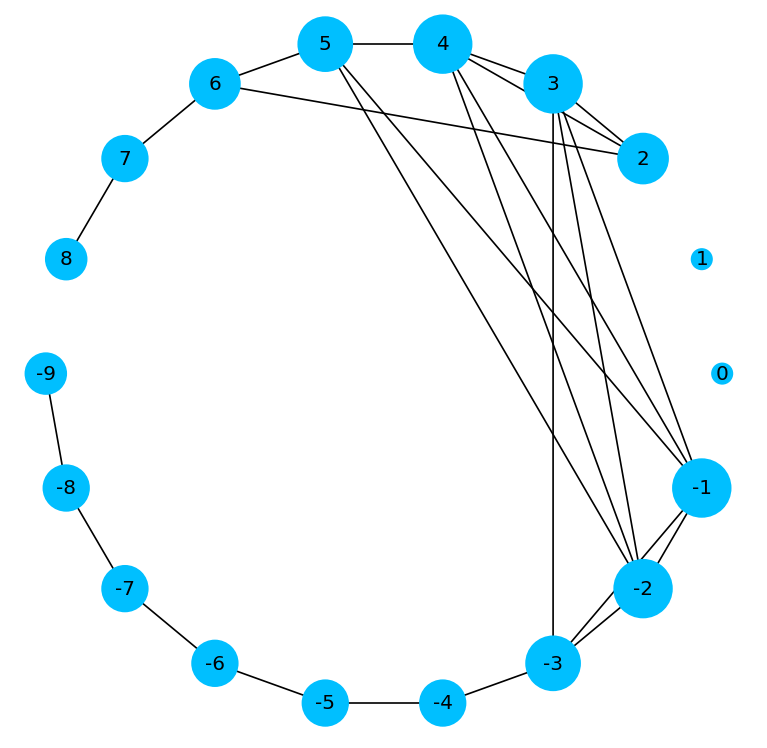

In [46]:

def func(info):
    if info[0] == "Label":
        return 99
    else:
#         print(info)
        return int(info[0])
def plot_network(G,figsize=(8, 8)):
    fig, ax1 = plt.subplots(1, 1, figsize=figsize, dpi=120)
    H = nx.Graph()
    H.add_nodes_from(sorted(G.nodes(data=True), key=func))
    H.add_edges_from(G.edges(data=True))

    bicolors = ['deepskyblue','salmon']
    nodesize = np.array([float(H.degree(v) + 1) for v in H])
    nodecolor = np.array([bicolors[int('Label' == i)] for i in H])
    nx.draw(H, with_labels=True, node_color=nodecolor,pos = nx.shell_layout(H),
             ax=ax1,node_size=nodesize*150)
    plt.show()
    return fig
fig=plot_network(G)
fig.savefig('BNoutput/network_18_donor.png',dpi=120)

In [38]:
G2 = nx.DiGraph()
train_pseudo_dt = pre.dependence_table("BNoutput/Train_pseudoDonor_signal_str.txt")
G2.add_nodes_from(nodes)
for j in range(18):
    for k in range(j, 18):
        if train_pseudo_dt[j, k]:
            G2.add_edge(j-9, k-9)
# print(chart)
df_pseudo_dt = pd.DataFrame(train_pseudo_dt,columns=nodes)
df_pseudo_dt.to_csv("BNoutput/dependence_table.csv",index=None)

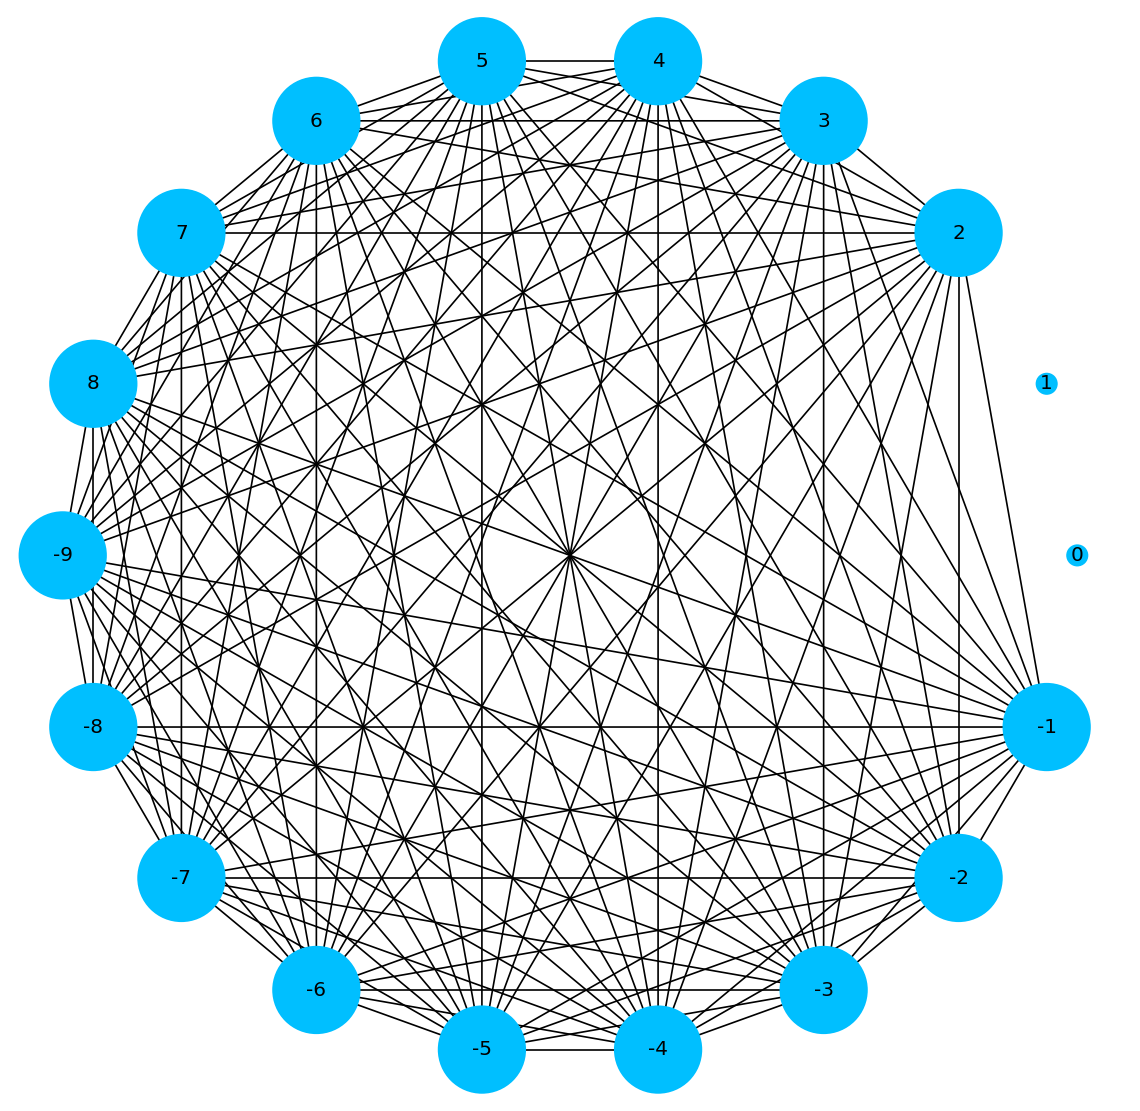

In [48]:
fig2=plot_network(G2,figsize=(12, 12))
fig2.savefig('BNoutput/network_18_pseudo.png',dpi=120)

In [57]:

lower_bases="acgtz"

char_to_int = {c:i for i, c in enumerate(lower_bases)}
def process_to_int(donor):
    donor = list(donor)
    integer_encoded = [char_to_int[char] for char in donor]
    return list(integer_encoded)

def code_all_seq(all_str):
    all_str = tqdm(all_str, desc='code_all_signal:')
    int_coded=map(process_to_int,all_str)
    return np.array(list(int_coded))

In [54]:
train_donor_signal_all_str = np.loadtxt("BNoutput/Train_donor_signal_str.txt",dtype = str)

array(['cgcgctcagtgtaagtatcatt', 'atctccattcgtaagtacctct',
       'atgtggtagggtaagagagaag', ..., 'gattttgacagtgagtagtctt',
       'ttcgaaagaagtgagtccgggc', 'ccgaagacaggtaactacgccc'], dtype='<U22')

In [ ]:
train_donor_features = code_all_seq(train_donor_signal_all_str)

In [52]:
train_df=pd.read_csv("BNoutput/Train_donor_signal_info.csv")
train_df

,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8
0,g,c,g,c,t,c,a,g,t,g,t,a,a,g,t,a,t,c
1,t,c,t,c,c,a,t,t,c,g,t,a,a,g,t,a,c,c
2,t,g,t,g,g,t,a,g,g,g,t,a,a,g,a,g,a,g
3,c,c,a,c,c,t,c,a,g,g,t,g,g,g,g,g,c,c
4,t,g,c,c,c,a,g,a,g,g,t,g,a,g,t,t,t,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,a,a,c,t,t,c,c,a,g,g,t,a,g,g,t,g,g,c
2375,g,t,t,t,c,a,a,a,g,g,t,a,a,g,t,g,g,c
2376,a,t,t,t,t,g,a,c,a,g,t,g,a,g,t,a,g,t
2377,t,c,g,a,a,a,g,a,a,g,t,g,a,g,t,c,c,g


In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

model = BayesianModel(G.edges())
model.fit(train_df, estimator=BayesianEstimator, prior_type="BDeu")